In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_excel('customer_data.xlsx')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
df['workclass'].mode()
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

In [5]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [6]:
le = LabelEncoder()
df['sex'] = pd.get_dummies(df['sex'],drop_first=True,dtype='int')

In [7]:
df['native-country'] = le.fit_transform(df['native-country'])
df['race'] = le.fit_transform(df['race'])

df['relationship'] = le.fit_transform(df['relationship'])
df['occupation'] = le.fit_transform(df['occupation'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['education'] = le.fit_transform(df['education'])
df['workclass'] = le.fit_transform(df['workclass'])
df['income'] = le.fit_transform(df['income'])

In [8]:
df = df.drop('capital-gain',axis=True)
df = df.drop('capital-loss',axis=True)
df = df.drop('native-country',axis=True)

In [9]:
df['income'].value_countsunts()

income
0    24720
1    12435
2     7841
3     3846
Name: count, dtype: int64

In [13]:
df.isnull().sum()/len(df)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
hours-per-week    0.0
income            0.0
dtype: float64

array([[<Axes: title={'center': 'hours-per-week'}>]], dtype=object)

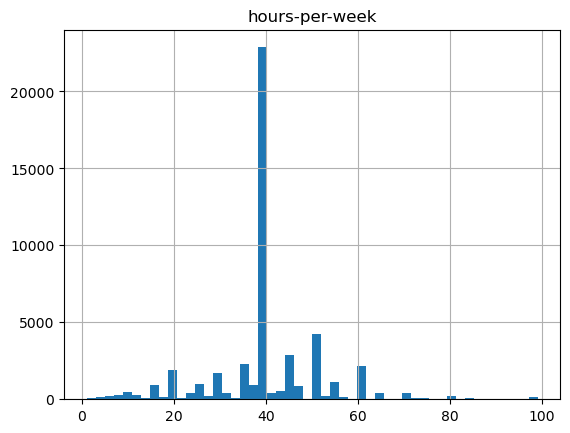

In [12]:
df.hist(column='hours-per-week', bins=50)

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

In [15]:
X = df[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'income']].values
X[0:5]

array([[    39,      7,  77516,      9,     13,      4,      1,      1,
             4,      1,     40,      0],
       [    50,      6,  83311,      9,     13,      2,      4,      0,
             4,      1,     13,      0],
       [    38,      4, 215646,     11,      9,      0,      6,      1,
             4,      1,     40,      0],
       [    53,      4, 234721,      1,      7,      2,      6,      0,
             2,      1,     40,      0],
       [    28,      4, 338409,      9,     13,      2,     10,      5,
             2,      0,     40,      0]], dtype=int64)

In [17]:
y = df['income'].values

In [20]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.02599598,  2.24736163, -1.06197924, -0.33254239,  1.136512  ,
         0.91613819, -1.3912317 , -0.2766849 ,  0.39238393,  0.70422049,
        -0.03408696, -0.83464261],
       [ 0.82830842,  1.51068939, -1.00710388, -0.33254239,  1.136512  ,
        -0.41039699, -0.66857401, -0.9008521 ,  0.39238393,  0.70422049,
        -2.21303208, -0.83464261],
       [-0.04694151,  0.03734492,  0.24603353,  0.18365954, -0.41933527,
        -1.73693217, -0.18680222, -0.2766849 ,  0.39238393,  0.70422049,
        -0.03408696, -0.83464261],
       [ 1.0471209 ,  0.03734492,  0.42666297, -2.39735012, -1.19725891,
        -0.41039699, -0.18680222, -0.9008521 , -1.97174558,  0.70422049,
        -0.03408696, -0.83464261],
       [-0.77631645,  0.03734492,  1.40852953, -0.33254239,  1.136512  ,
        -0.41039699,  0.77674136,  2.21998388, -1.97174558, -1.42000981,
        -0.03408696, -0.83464261]])

In [21]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (39073, 12) (39073,)
Test set: (9769, 12) (9769,)


In [22]:
k = 4

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [23]:
yhat = neigh.predict(X_test)
yhat[0:5]


array([0, 2, 3, 0, 0])

In [25]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9655516597138689
Test set Accuracy:  0.9398096018016173


In [27]:

y_pred = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[4987,   13,    0,    0],
       [ 296, 2136,   26,    0],
       [   7,  120, 1373,    4],
       [   0,    4,  118,  685]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

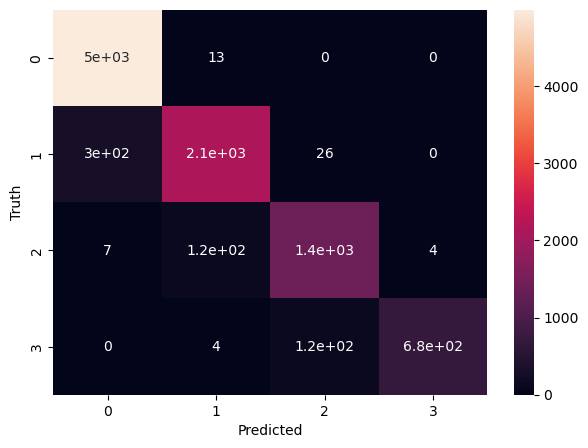

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5000
           1       0.94      0.87      0.90      2458
           2       0.91      0.91      0.91      1504
           3       0.99      0.85      0.92       807

    accuracy                           0.94      9769
   macro avg       0.95      0.91      0.92      9769
weighted avg       0.94      0.94      0.94      9769

